In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
#pip install sentiment-analysis-spanish
from sentiment_analysis_spanish import sentiment_analysis

import re
#from os import path
#import numpy as np
from wordcloud import WordCloud, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize 

**Banco de Chile**

In [2]:
df = pd.read_csv('banco_chile_limpio.csv')
df = df[['date','tweet']]
df.head()

,date,tweet
0,2021-03-21,El año pasado la postergación de cuotas de cré...
1,2021-03-21,Empezaron las estafas con las cuentas 100%digi...
2,2021-03-15,Gracias a BancoChile y su app de mier que se c...
3,2021-03-15,"Me cambié de esa mierda de banco, saqué cuenta..."
4,2021-03-14,Me imagino que CUENTACORRENTISTAS y ACCIONISTA...


In [3]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [4]:
df["tweet"] = df["tweet"].str.lower()
df['tweet'] = df.apply(lambda row : normalize(row['tweet']), axis = 1)

In [5]:
stop_words = set(stopwords.words('spanish'))
stop_words.update(['banco','bancoestado','estado','(',')',' " ','q','chile','ahora','si','..','.','...',':'
                  ,',','hola','?',']','[', 'bancochile','bancodechile','bci'])

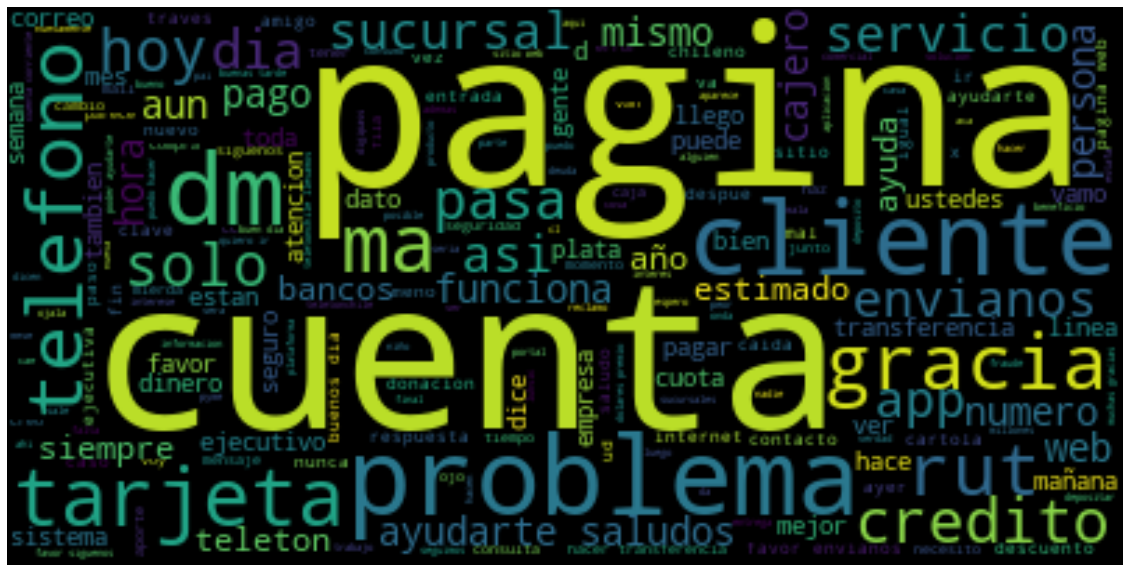

In [6]:
textt = ' '.join( [twts for twts in df['tweet']])
wordcloud = WordCloud(stopwords=stop_words).generate(textt)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_banco_chile.png')
plt.show()

In [7]:
data = df.loc[::-1].reset_index(drop = True)
data.head()

,date,tweet
0,2010-01-04,"algun lugar recomendable para comprar euros? ,..."
1,2010-01-04,un cajero del bancodechile me comio 5 lukas e...
2,2010-01-04,tus vacaciones pueden ser mucho mejor comprand...
3,2010-01-04,¿que onda la web del ? ¿se les perdio mi plata...
4,2010-01-04,porque la pag del banco es siempre tan lennnn...


In [8]:
fechas = data['date'].unique() # recorridas en sentido contrario a volumen!
volumen = data.groupby("date").size().values
data = pd.DataFrame({'date': fechas, 'volumen':volumen})
data.head()

,date,volumen
0,2010-01-04,1
1,2010-01-05,14
2,2010-01-06,5
3,2010-01-07,4
4,2010-01-08,3


In [9]:
data['text'] = ''
for i in range(fechas.size):
    aux = df[df['date'] == fechas[i]]['tweet']
    data['text'][i] = ' '.join( [twts for twts in aux])
    
data['clean_txt'] = ''
for i in range(fechas.size): 
    text = data['text'][i]
    clean = [word for word in word_tokenize(text) if word not in stop_words]
    clean_text = ' '.join(clean)
    data['clean_txt'][i] = clean_text

<ipython-input-9-0966a31945a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'][i] = ' '.join( [twts for twts in aux])
<ipython-input-9-0966a31945a3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_txt'][i] = clean_text


In [10]:
# ejemplito
text = data['text'][1]
print(text)
text_token = word_tokenize(text)
print('\n')
print(text_token)

clean = [word for word in word_tokenize(text) if word not in stop_words]
clean_text = ' '.join(clean)
print('\n')
print(clean_text)


haciendo la mansa ni que fila en el bancochile para cambiar un vale vista en enero ahorra hasta un 50% pagando con tus dolares-premio siiiiiiiiiiii, llevo horas tratando de arreglar mis cuentas! bancodechile ¿que le pasa a la web de ?!¡ ven por tu hipotecario y ser parte de la hinchada del chile en el mundial


['haciendo', 'la', 'mansa', 'ni', 'que', 'fila', 'en', 'el', 'bancochile', 'para', 'cambiar', 'un', 'vale', 'vista', 'en', 'enero', 'ahorra', 'hasta', 'un', '50', '%', 'pagando', 'con', 'tus', 'dolares-premio', 'siiiiiiiiiiii', ',', 'llevo', 'horas', 'tratando', 'de', 'arreglar', 'mis', 'cuentas', '!', 'bancodechile', '¿que', 'le', 'pasa', 'a', 'la', 'web', 'de', '?', '!', '¡', 'ven', 'por', 'tu', 'hipotecario', 'y', 'ser', 'parte', 'de', 'la', 'hinchada', 'del', 'chile', 'en', 'el', 'mundial']


haciendo mansa fila cambiar vale vista enero ahorra 50 % pagando dolares-premio siiiiiiiiiiii llevo horas tratando arreglar cuentas ! ¿que pasa web ! ¡ ven hipotecario ser parte hinchad

In [11]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
data['sentiment'] = data.apply(lambda row : sentiment.sentiment(row['clean_txt']), axis = 1) 
data['sentiment_raw'] = data.apply(lambda row : sentiment.sentiment(row['text']), axis = 1)

In [12]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data

,volumen,text,clean_txt,sentiment,sentiment_raw
date,,,,,
2010-01-04,1,alguien puede hacer transacciones en bancochil...,alguien puede hacer transacciones bancochile.c...,3.232469e-17,2.436859e-40
2010-01-05,14,haciendo la mansa ni que fila en el bancochile...,haciendo mansa fila cambiar vale vista enero a...,1.470025e-05,2.079251e-11
2010-01-06,5,aviso destacado : ejecutivos de terreno para i...,aviso destacado ejecutivos terreno institucion...,6.556791e-03,1.082772e-04
2010-01-07,4,no puee ser que la del reclamo sea yo y mas en...,puee ser reclamo mas encima llamar negociar pa...,4.068093e-05,5.919038e-09
2010-01-08,3,deje mi carnet el martes en bancodechile y lla...,deje carnet martes llaman recien hoy 15:00 dec...,1.052339e-01,2.366985e-05
...,...,...,...,...,...
2012-01-29,81,el color de ojos de la niña del comercial de b...,color ojos niña comercial verdad hace recordar...,1.513520e-01,3.470234e-03
2013-01-13,76,comprar entradas al cine via bancochile y que ...,comprar entradas cine via salga error sql log ...,1.589965e-02,2.234028e-05
2013-07-28,64,el colmo q c todo lo q los bcos roban a sus cl...,colmo c bcos roban clientes part pretendan pag...,1.307544e-01,1.471720e-02


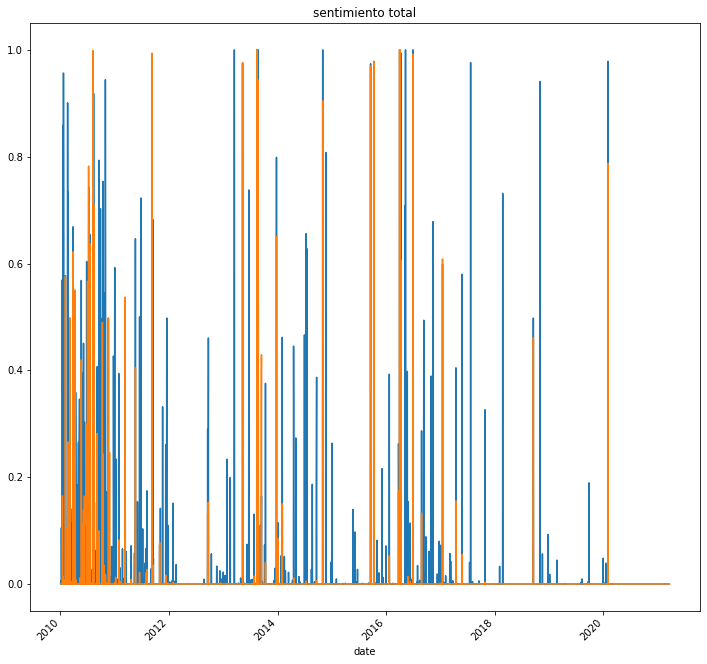

In [13]:
plt.figure(figsize=(12, 12))
ax = data['sentiment'].plot()
ax2 = data['sentiment_raw'].plot()
#ax.xaxis.set_major_locator(md.YearLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
ax.set_title('sentimiento total')
plt.show()


In [14]:
data[data["sentiment"] >= 0.4]

,volumen,text,clean_txt,sentiment,sentiment_raw
date,,,,,
2010-01-14,12,por que el comercial de bancochile tiene los c...,comercial colores estrellita muerte ahorre $ 1...,0.569372,0.000016
2010-01-18,3,aclara tus dudas de cuenta movil en www.cuenta...,aclara dudas cuenta movil www.cuentamovil.cl s...,0.754853,0.013684
2010-01-20,2,tus vacaciones pueden ser mucho mejor. compra ...,vacaciones pueden ser mejor compra quieras 3 2...,0.858551,0.002719
2010-01-22,1,deberian validar en el campo contraseña del lo...,deberian validar campo contraseña login activo...,0.956628,0.001141
2010-01-28,2,amamos a bancochile que me acaba de donar exce...,amamos acaba donar excedentes capacitar peñalo...,0.464997,0.006222
...,...,...,...,...,...
2020-02-02,44,genial jajajaja preparense bancoestado bancos...,genial jajajaja preparense bancosantander vari...,0.978513,0.787500
2010-03-28,70,gueno el comercial de bancochile ojala asi sea,gueno comercial ojala asi,0.668723,0.621870
2010-07-10,43,todoo listo saliendo al aeropuerto para johane...,todoo listo saliendo aeropuerto johanesburgo a...,0.639758,0.782463


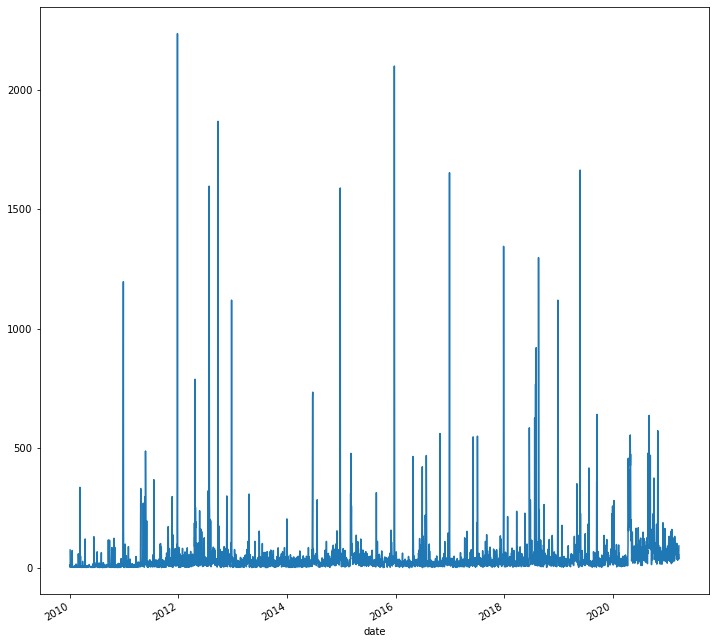

In [15]:
plt.figure(figsize=(12, 12))

(data['volumen']*(1-data['sentiment_raw'])).plot()
#ax = data['volumen'].plot()


ax.set_title('grafico de volumen vs métrica')
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
plt.show()

In [16]:
hack03 = data.loc['2020-09-06']['clean_txt']
hack = data.loc['2020-09-07']['clean_txt']

In [17]:
######### 2020-09-06  #########

tokens = nltk.word_tokenize(hack03[0])
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('!', 43), ('&', 24), (';', 24), ('3', 15), ('llenar', 14), ('breve', 14), ('encuesta', 14), ('fines', 14), ('estudios', 14), ('universitarios', 14), ('agradeceria', 14), ('cuenta', 13), ('lt', 13), ('verdad', 13), ('puedes', 11), ('note', 10), ('cliente', 10), ('😱😱', 10), ('--', 10), ('-', 10), ('gt', 10), ('super', 10), ('cortita', 10), ('fan', 8), ('dm', 8), ('favor', 7), ('rut', 6), ('%', 5), ('pueden', 5), ('tarjeta', 4)]


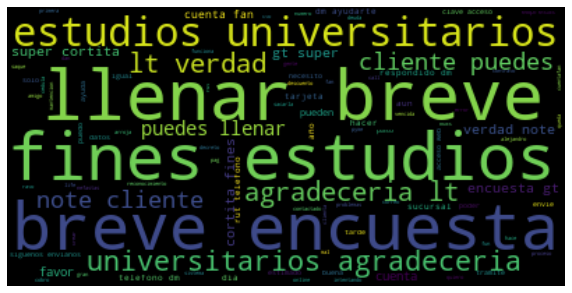

In [18]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack03[0])
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
tokens = nltk.word_tokenize(hack[0])
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('!', 171), ('¡saludos', 75), ('cuenta', 72), ('favor', 69), ('rut', 62), ('dm', 60), ('ayudarte', 60), ('envianos', 57), ('telefono', 55), ('``', 50), ('fan', 38), ('app', 37), ('nuevamente', 37), ('linea', 35), ('mas', 34), ('ingresar', 34), ('disponible', 31), ('dia', 31), ('intenta', 30), ('clave', 26), ('acceso', 26), ('dias', 26), ('buen', 26), ('buenas', 25), ('puedo', 25), ('problemas', 25), ('sucursal', 24), ('tardes', 24), ('hacer', 22), ('estimado', 22)]


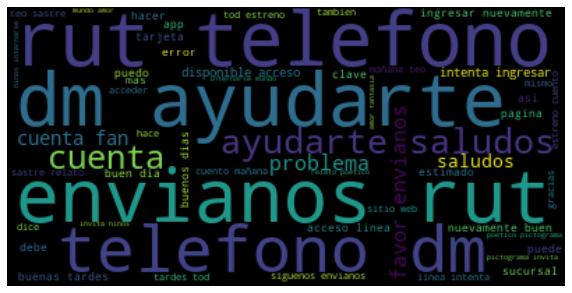

In [20]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack[0])
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
# calculando la media móvil de a 1 mes:
data['M'] = data['volumen']*(1- data['sentiment_raw'] )
data['SMA'] = data.iloc[:,5].rolling(window=30).mean()
data['SMA_SE'] = data.iloc[:,5].rolling(window=30).std()

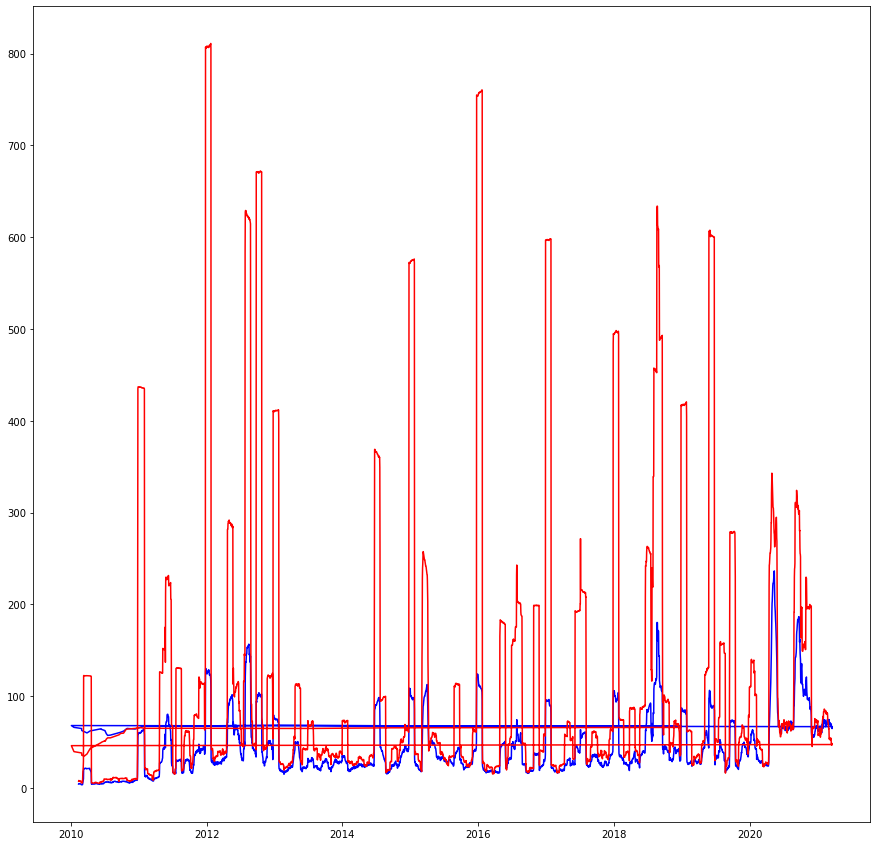

In [22]:
plt.figure(figsize=(15, 15))

plt.plot(data.iloc[:,6],'b')
plt.plot(data.iloc[:,7]*2,'r')
 #ax.set_title('Media móvil 30 días')
 #plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
plt.show()

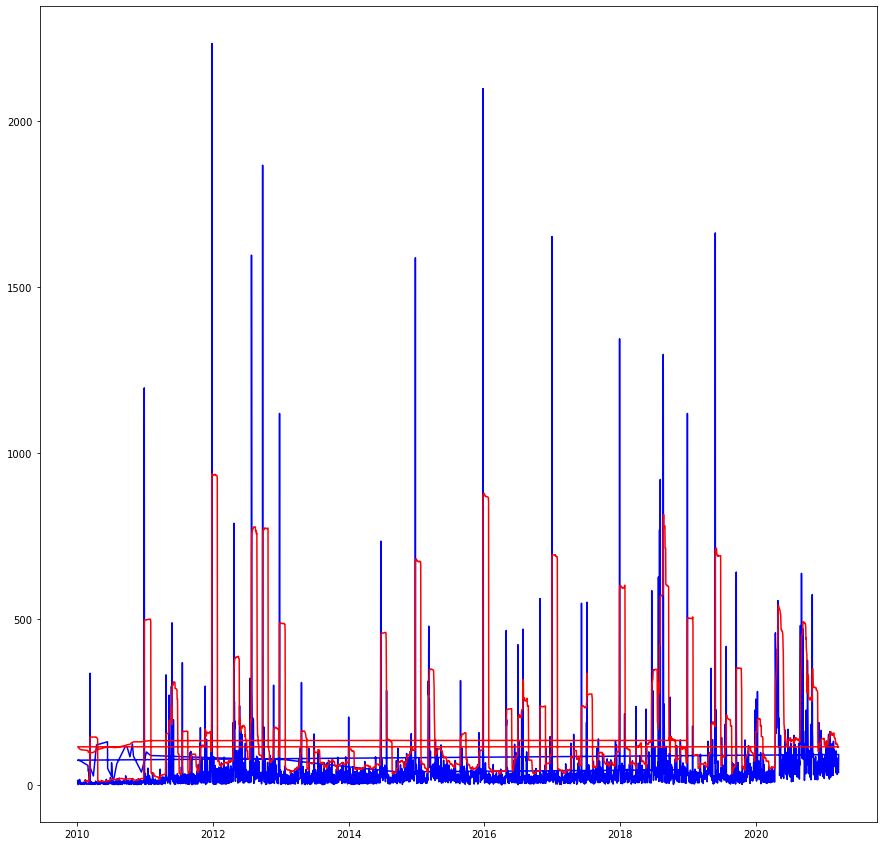

In [23]:
plt.figure(figsize=(15, 15))

plt.plot(data.iloc[:,5],'b')
plt.plot(data.iloc[:,7]*2 + data.iloc[:,6],'r')
 #ax.set_title('Media móvil 30 días')
 #plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
plt.show()

In [40]:
# guardar df en csv de banco chile
#serie.to_csv(r'serie.csv')
serie = data.iloc[:,[0,3,4,5,6,7]]
serie.to_csv(r'banco_chile_volumen.csv')
serie

,volumen,sentiment,sentiment_raw,M,SMA,SMA_SE
date,,,,,,
2010-01-04,1,3.232469e-17,2.436859e-40,1.000000,NaN,NaN
2010-01-05,14,1.470025e-05,2.079251e-11,14.000000,NaN,NaN
2010-01-06,5,6.556791e-03,1.082772e-04,4.999459,NaN,NaN
2010-01-07,4,4.068093e-05,5.919038e-09,4.000000,NaN,NaN
2010-01-08,3,1.052339e-01,2.366985e-05,2.999929,NaN,NaN
...,...,...,...,...,...,...
2012-01-29,81,1.513520e-01,3.470234e-03,80.718911,67.824668,32.568798
2013-01-13,76,1.589965e-02,2.234028e-05,75.998302,68.591278,32.478363
2013-07-28,64,1.307544e-01,1.471720e-02,63.058099,68.326548,32.490418


**Banco BCI**


In [24]:
df2 = pd.read_csv('banco_bci_limpio.csv')
df2 = df2[['date','tweet']]
df2.head()

,date,tweet
0,2021-03-21,"Hola Daniela, derivaremos la información al ár..."
1,2021-03-21,Al parecer a le importa muy poco que uno de s...
2,2021-03-21,siempre tiene problemas con su plataforma Qui...
3,2021-03-21,Eso es una desfachatez dxe este Banco Hipocrit...
4,2021-03-21,"Hola Romina, nuestras plataformas se encuentra..."


In [25]:
df2["tweet"] = df2["tweet"].str.lower()
df2['tweet'] = df2.apply(lambda row : normalize(row['tweet']), axis = 1)

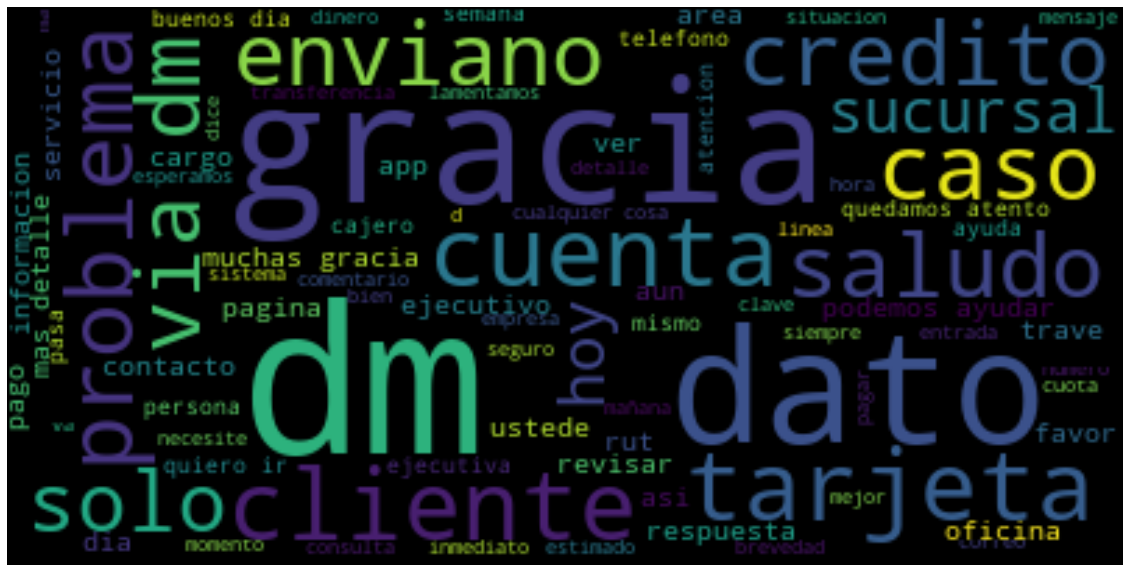

In [26]:
textt = ' '.join( [twts for twts in df2['tweet']])
wordcloud = WordCloud(stopwords=stop_words).generate(textt)

plt.figure(1,figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud_bci.png')
plt.show()

In [27]:
data2 = df2.loc[::-1].reset_index(drop = True)
fechas = data2['date'].unique() # recorridas en sentido contrario a volumen!
volumen = data2.groupby("date").size().values
data2 = pd.DataFrame({'date': fechas, 'volumen':volumen})

data2['text'] = ''
for i in range(fechas.size):
    aux = df2[df2['date'] == fechas[i]]['tweet']
    data2['text'][i] = ' '.join( [twts for twts in aux])
    
data2['clean_txt'] = ''
for i in range(fechas.size): 
    text = data2['text'][i]
    clean = [word for word in word_tokenize(text) if word not in stop_words]
    clean_text = ' '.join(clean)
    data2['clean_txt'][i] = clean_text

<ipython-input-27-8d16d6974a44>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['text'][i] = ' '.join( [twts for twts in aux])
<ipython-input-27-8d16d6974a44>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['clean_txt'][i] = clean_text


In [28]:
data2['sentiment'] = data2.apply(lambda row : sentiment.sentiment(row['clean_txt']), axis = 1) 
data2['sentiment_raw'] = data2.apply(lambda row : sentiment.sentiment(row['text']), axis = 1)
data2['date'] = pd.to_datetime(data2['date'])
data2.set_index('date', inplace=True)
data2

,volumen,text,clean_txt,sentiment,sentiment_raw
date,,,,,
2010-04-05,2,sigue sin contestarme! por favor necesito comu...,sigue contestarme ! favor necesito comunicarme...,9.649031e-03,1.943019e-06
2010-04-06,1,definitivamente no contesta los telefonos de ...,definitivamente contesta telefonos atencion cl...,5.308796e-01,4.756535e-02
2010-04-24,1,me he suscrito al canal de bancobci en youtube,suscrito canal bancobci youtube,4.978923e-01,1.109884e-01
2010-05-10,1,que considerado “aumentamos tu linea de credi...,considerado “ aumentamos linea credito mes mad...,3.362510e-02,6.335941e-05
2010-06-02,1,son unos ladrones los de ... cerre mi cta cte...,ladrones cerre cta cte 2 semanas despues cobra...,3.313336e-03,1.570998e-04
...,...,...,...,...,...
2021-03-17,26,"gracias por la respuesta, una cosa no me queda...",gracias respuesta cosa queda claro copia escri...,8.619620e-31,4.531755e-99
2021-03-18,48,tan tarde atentos por eso son mi bco es para u...,tan tarde atentos bco amigo ¡hola ! escribenos...,3.709269e-50,1.811295e-150
2021-03-19,55,¡buenas noches! para poder ayudar en esta situ...,¡buenas noches ! poder ayudar situacion import...,2.376749e-74,2.044527e-219


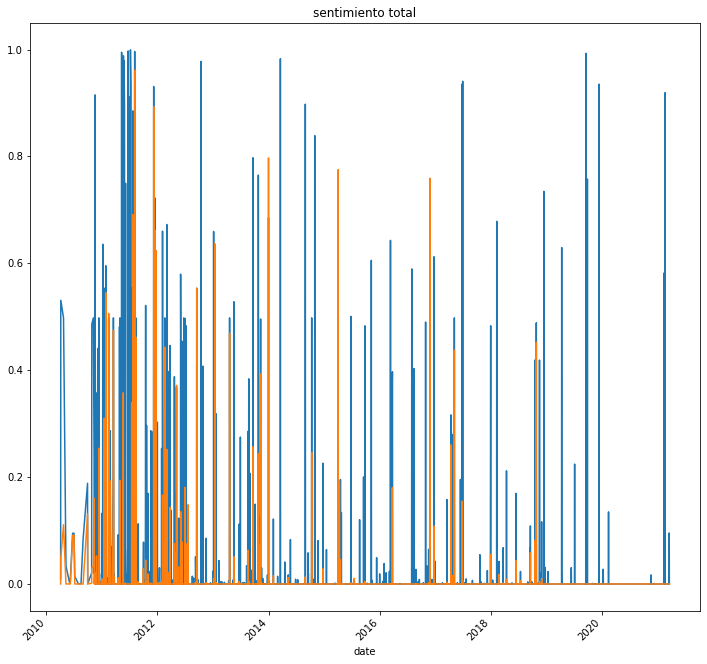

In [29]:
plt.figure(figsize=(12, 12))
ax = data2['sentiment'].plot()
ax2 = data2['sentiment_raw'].plot()
#ax.xaxis.set_major_locator(md.YearLocator())
#ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
ax.set_title('sentimiento total')
plt.show()


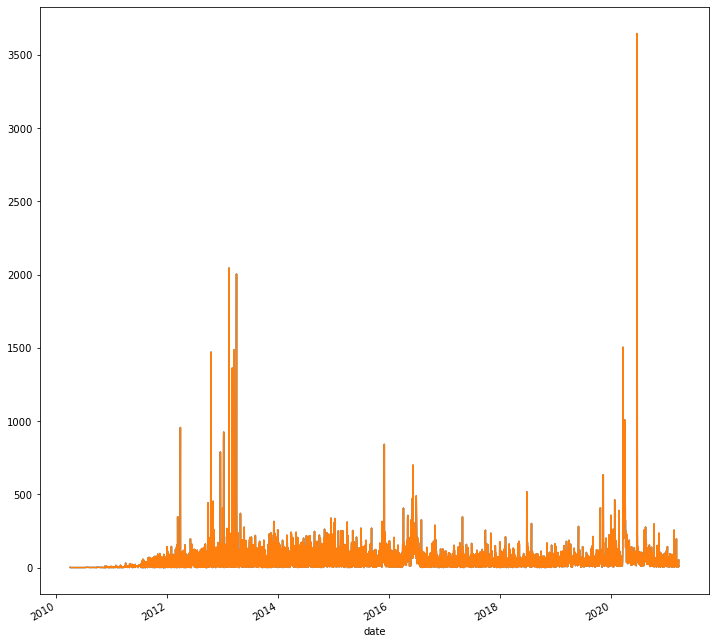

In [30]:
plt.figure(figsize=(12, 12))

(data2['volumen']*(1-data2['sentiment_raw'])).plot()
data2['volumen'].plot()
#ax = data['volumen'].plot()


ax.set_title('grafico de volumen vs métrica')
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
plt.show()

In [31]:
hack0 = data2.loc['2020-09-06']['clean_txt']
hack1 = data2.loc['2020-09-07']['clean_txt']

In [32]:
tokens = nltk.word_tokenize(hack0)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('dm', 7), ('envianos', 5), ('saludos', 5), ('!', 5), ('puedo', 4), ('mas', 4), ('error', 3), ('mismo', 3), ('bcipass', 3), ('revisar', 3), ('ayudarte', 3), ('pagar', 2), ('2', 2), ('transferir', 2), ('dinero', 2), ('llamado', 2), ('servicio', 2), ('hice', 2), ('semana', 2), ('recomiendo', 2), ('datos', 2), ('mensaje', 2), ('aparece', 2), ('informacion', 2), ('quisiera', 2), ('intermitencia', 2), ('problema', 2), ('favor', 2), ('hacer', 2), ('consulta', 2)]


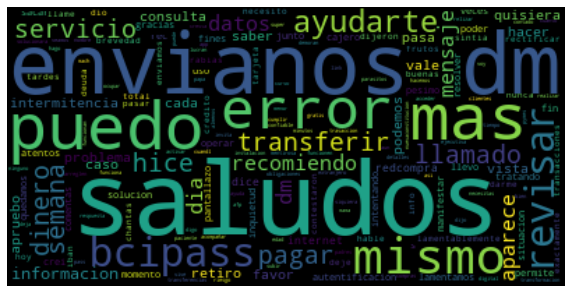

In [33]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack0)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
tokens = nltk.word_tokenize(hack1)
text = nltk.Text(tokens)

tokens_l = [w for w in tokens]
freq = nltk.FreqDist(tokens_l)
print(freq.most_common(30))

[('!', 40), ('dm', 27), ('favor', 15), ('mas', 12), ('¡hola', 12), ('gracias', 10), ('ayudarte', 8), ('hacer', 8), ('necesito', 8), ('cuenta', 7), ('cae', 7), ('escribenos', 7), ('buenas', 7), ('puedo', 7), (';', 7), ('revisar', 6), ('hace', 6), ('pagina', 6), ('caso', 6), ('detalles', 6), ('podamos', 6), ('poder', 5), ('dias', 5), ('hoy', 5), ('tardes', 5), ('comentanos', 5), ('envianos', 5), ('pagar', 5), ('años', 5), ('lamentamos', 4)]


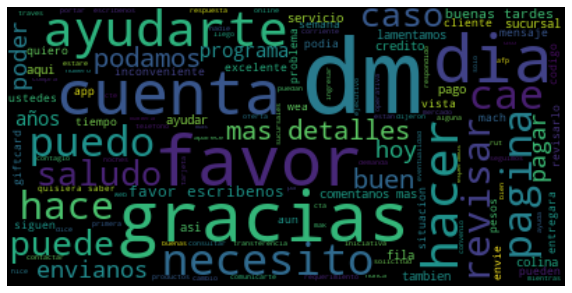

In [35]:
wordcloud = WordCloud(stopwords=stop_words).generate(hack1)
plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
# calculando la media móvil de a 1 mes:
data2['M'] = data2['volumen']*(1- data2['sentiment_raw'] )
data2['SMA'] = data2.iloc[:,5].rolling(window=30).mean()
data2['SMA_SE'] = data2.iloc[:,5].rolling(window=30).std()

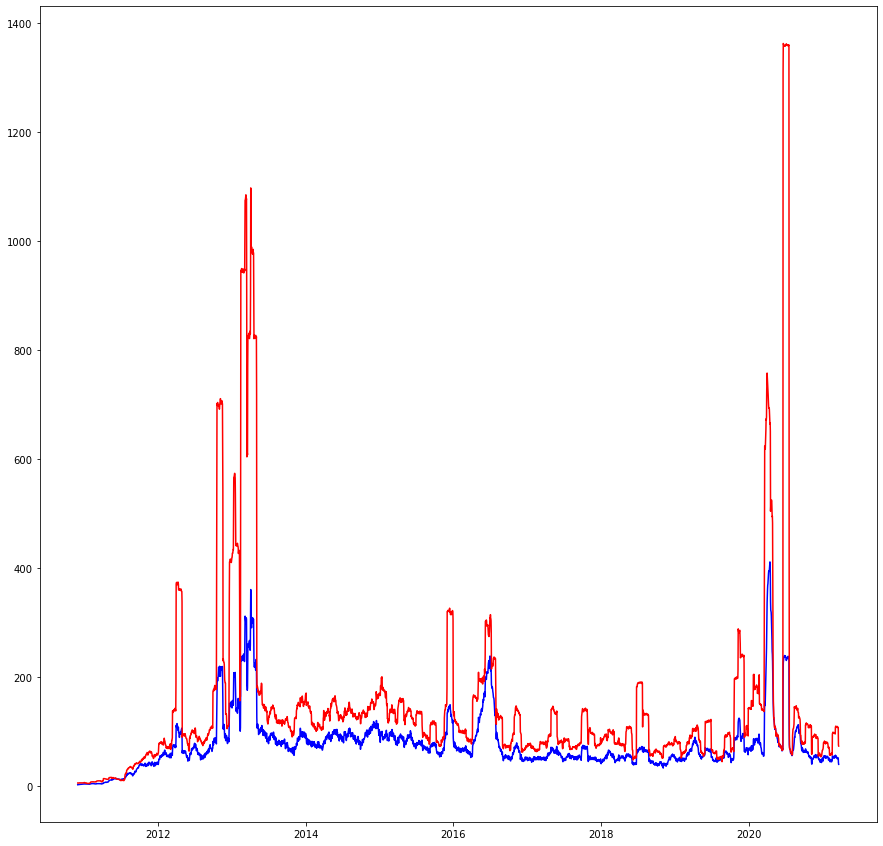

In [37]:
plt.figure(figsize=(15, 15))

plt.plot(data2.iloc[:,6],'b')
plt.plot(data2.iloc[:,7]*2,'r')
 #ax.set_title('Media móvil 30 días')
 #plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
plt.show()

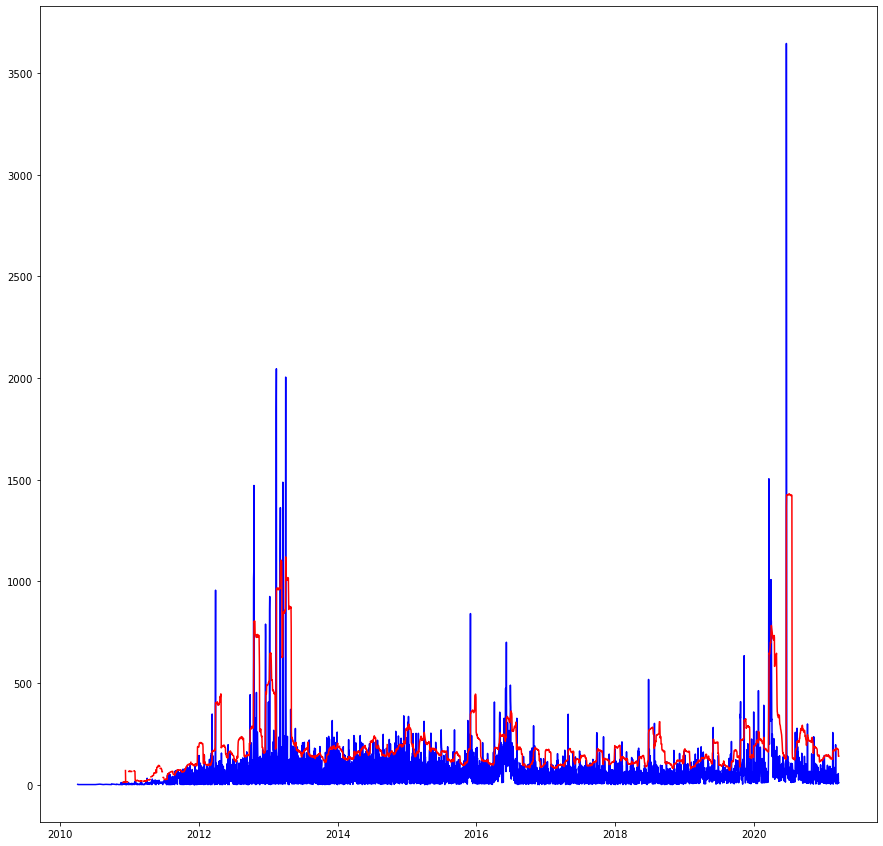

In [38]:
plt.figure(figsize=(15, 15))

plt.plot(data2.iloc[:,5],'b')
plt.plot(data2.iloc[:,7]*2 + data.iloc[:,6],'r')
 #ax.set_title('Media móvil 30 días')
 #plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)
plt.show()

In [41]:
# guardar df en csv de banco chile
#serie.to_csv(r'serie.csv')
serie = data2.iloc[:,[0,3,4,5,6,7]]
serie.to_csv(r'banco_bci_volumen.csv')
serie

,volumen,sentiment,sentiment_raw,M,SMA,SMA_SE
date,,,,,,
2010-04-05,2,9.649031e-03,1.943019e-06,1.999996,NaN,NaN
2010-04-06,1,5.308796e-01,4.756535e-02,0.952435,NaN,NaN
2010-04-24,1,4.978923e-01,1.109884e-01,0.889012,NaN,NaN
2010-05-10,1,3.362510e-02,6.335941e-05,0.999937,NaN,NaN
2010-06-02,1,3.313336e-03,1.570998e-04,0.999843,NaN,NaN
...,...,...,...,...,...,...
2021-03-17,26,8.619620e-31,4.531755e-99,26.000000,50.633333,53.827620
2021-03-18,48,3.709269e-50,1.811295e-150,48.000000,51.100000,53.739057
2021-03-19,55,2.376749e-74,2.044527e-219,55.000000,50.866667,53.705283
